Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   obje

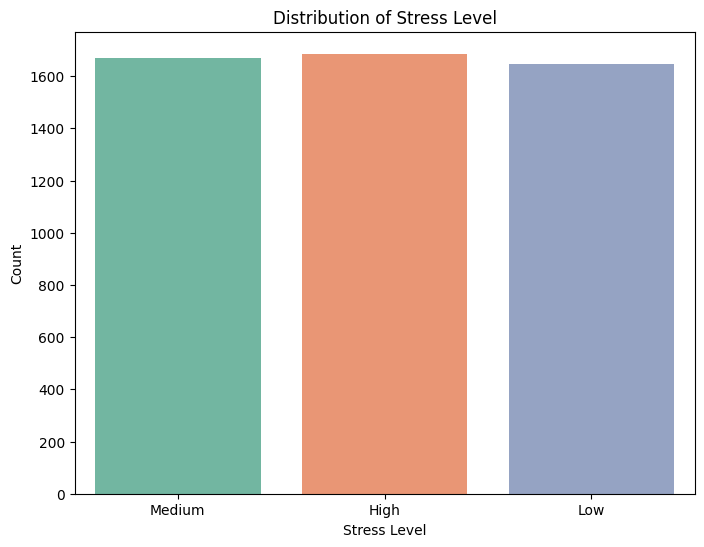

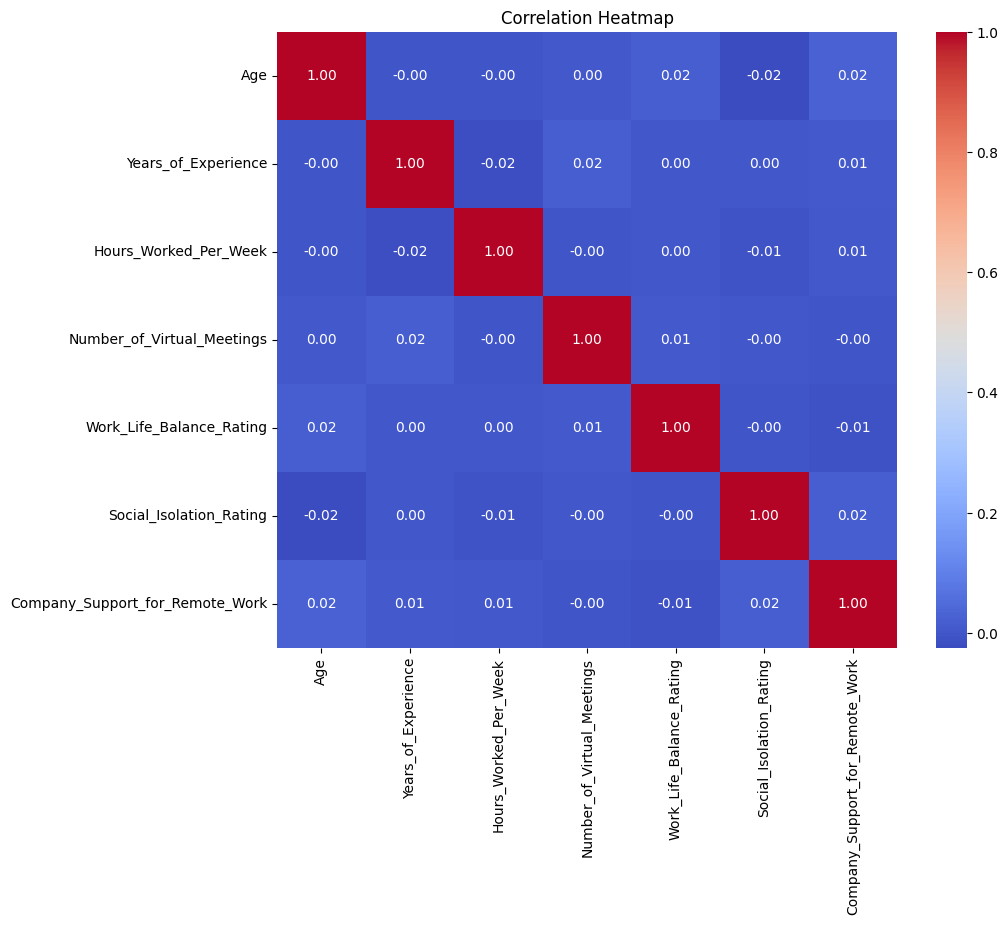

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
file_path = 'Impact_of_Remote_Work_on_Mental_Health.csv'
dataset = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# 1. Detailed EDA
# Summary statistics and basic details
print("Dataset Info:")
print(dataset.info())
print("\nSummary Statistics:")
print(dataset.describe(include='all'))
print("\nNull Values:")
print(dataset.isnull().sum())

# Visualize target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Stress_Level', palette='Set2', hue='Stress_Level', dodge=False)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend([], [], frameon=False)  
plt.show()

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

# Calculate and plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [40]:
# Preprocess and split the dataset
# Encode categorical variables and handle missing data if necessary
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

# Split the dataset into features (X) and target (y)
X = dataset.drop('Stress_Level', axis=1)
y = dataset['Stress_Level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 3. Decision Tree Classifier with Gini-index
# Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Predictions
y_pred_gini = clf_gini.predict(X_test)

# Accuracy
print("Accuracy (Gini Index):", accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))


Accuracy (Gini Index): 0.344
              precision    recall  f1-score   support

           0       0.35      0.36      0.35       496
           1       0.36      0.37      0.36       503
           2       0.32      0.31      0.31       501

    accuracy                           0.34      1500
   macro avg       0.34      0.34      0.34      1500
weighted avg       0.34      0.34      0.34      1500



In [39]:
# 4. Decision Tree Classifier with Entropy
# Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Predictions
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

Accuracy (Entropy): 0.3353333333333333
              precision    recall  f1-score   support

           0       0.34      0.37      0.35       496
           1       0.34      0.31      0.32       503
           2       0.33      0.33      0.33       501

    accuracy                           0.34      1500
   macro avg       0.34      0.34      0.34      1500
weighted avg       0.34      0.34      0.33      1500



In [15]:
from sklearn.metrics import accuracy_score

# 5. Check the accuracy of each attribute
print("\nAccuracy with Gini-index:", accuracy_score(y_test, y_pred_gini))
print("Accuracy with Entropy:", accuracy_score(y_test, y_pred_entropy))


Accuracy with Gini-index: 0.344
Accuracy with Entropy: 0.3353333333333333


In [17]:
from sklearn.metrics import classification_report

# 6. Analysis of Precision and Recall
print("\nClassification Report (Gini-index):")
print(classification_report(y_test, y_pred_gini))

print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))




Classification Report (Gini-index):
              precision    recall  f1-score   support

           0       0.35      0.36      0.35       496
           1       0.36      0.37      0.36       503
           2       0.32      0.31      0.31       501

    accuracy                           0.34      1500
   macro avg       0.34      0.34      0.34      1500
weighted avg       0.34      0.34      0.34      1500


Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.34      0.37      0.35       496
           1       0.34      0.31      0.32       503
           2       0.33      0.33      0.33       501

    accuracy                           0.34      1500
   macro avg       0.34      0.34      0.34      1500
weighted avg       0.34      0.34      0.33      1500



In [21]:
from sklearn.metrics import f1_score

# 7. F Score
print("F1 Score (Gini-index):", f1_score(y_test, y_pred_gini, average='weighted'))
print("F1 Score (Entropy):", f1_score(y_test, y_pred_entropy, average='weighted'))





F1 Score (Gini-index): 0.3437857229531714
F1 Score (Entropy): 0.3349368861538657


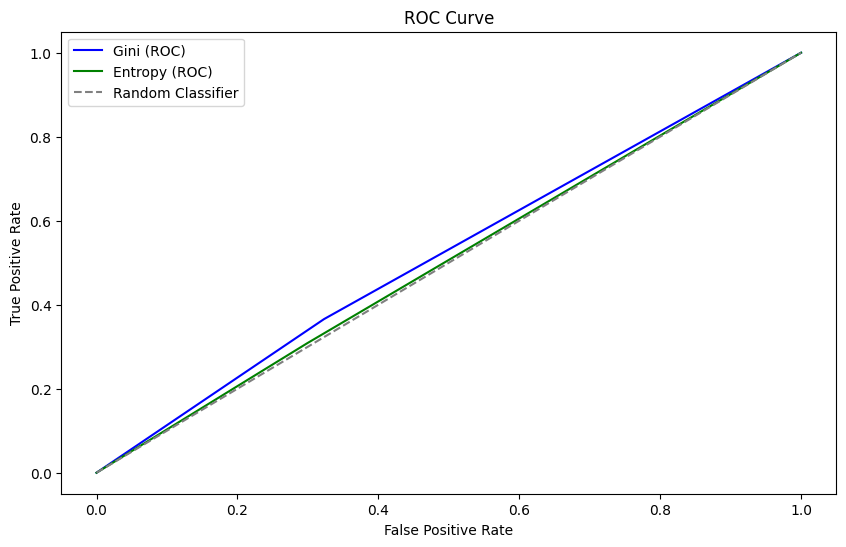

In [23]:
from sklearn.metrics import roc_curve

# 7. ROC Curve
y_prob_gini = gini_tree.predict_proba(X_test)[:, 1]
y_prob_entropy = entropy_tree.predict_proba(X_test)[:, 1]

fpr_gini, tpr_gini, _ = roc_curve(y_test, y_prob_gini, pos_label=1)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_prob_entropy, pos_label=1)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label='Gini (ROC)', color='blue')
plt.plot(fpr_entropy, tpr_entropy, label='Entropy (ROC)', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [24]:
# 9. Comparative Analysis
print("Comparative Analysis:")
print("Accuracy - Gini:", accuracy_score(y_test, y_pred_gini))
print("Accuracy - Entropy:", accuracy_score(y_test, y_pred_entropy))

Comparative Analysis:
Accuracy - Gini: 0.344
Accuracy - Entropy: 0.3353333333333333


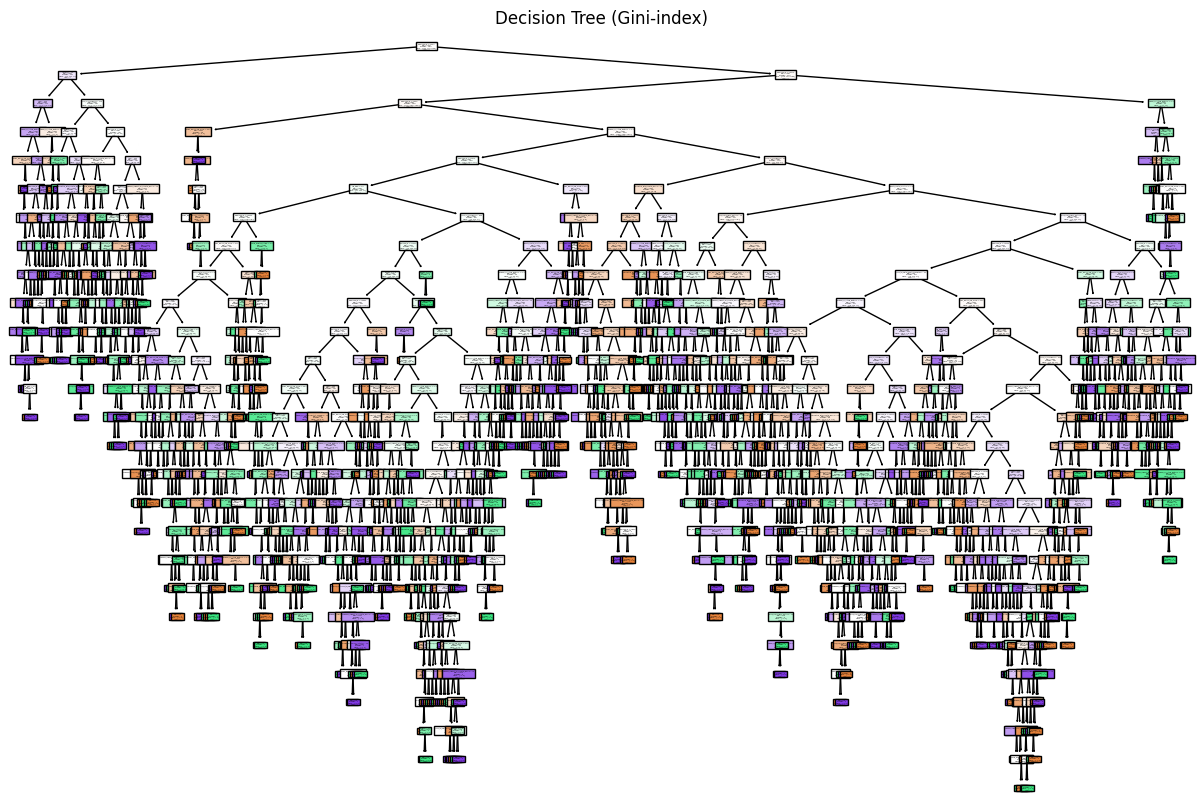

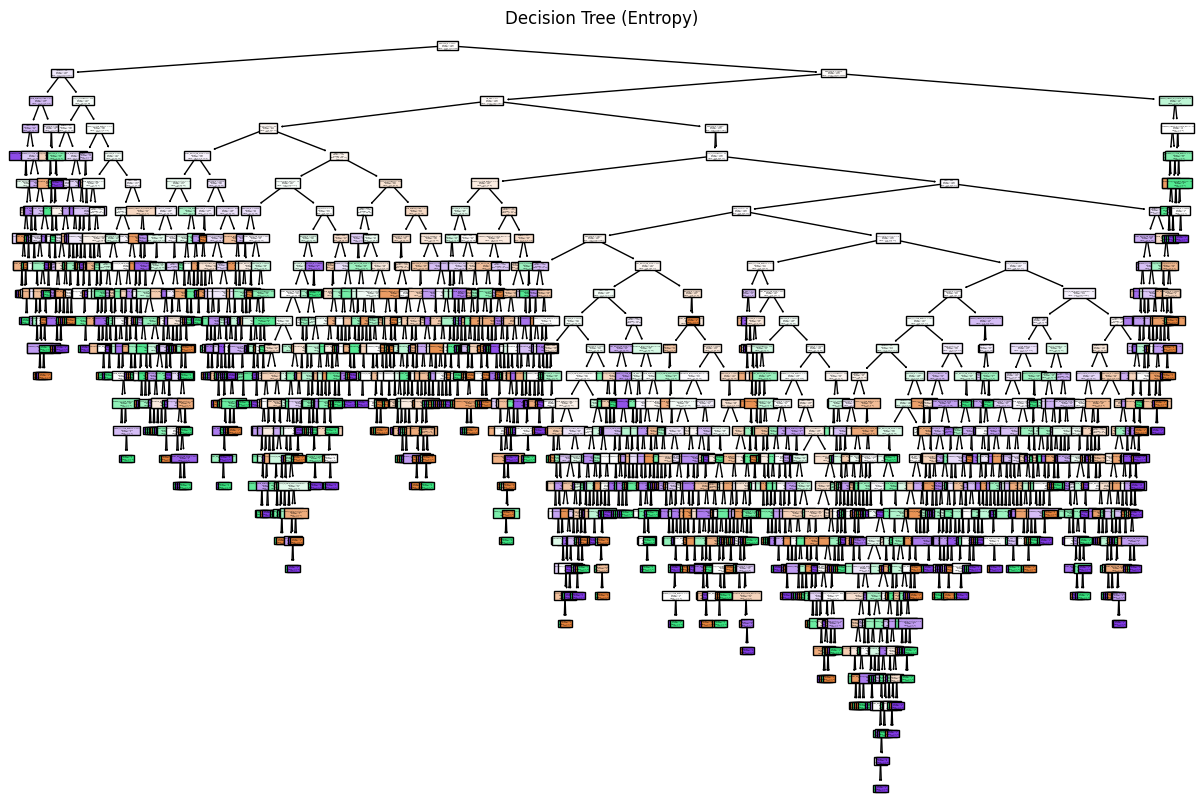

In [35]:
from sklearn.tree import plot_tree

# 10. Visualization of Tree
plt.figure(figsize=(15, 10))
plot_tree(
    gini_tree,
    feature_names=X.columns,
    class_names=[str(cls) for cls in gini_tree.classes_],
    filled=True
)
plt.title('Decision Tree (Gini-index)')
plt.show()

plt.figure(figsize=(15, 10))
plot_tree(
    entropy_tree,
    feature_names=X.columns,
    class_names=[str(cls) for cls in entropy_tree.classes_],
    filled=True
)
plt.title('Decision Tree (Entropy)')
plt.show()


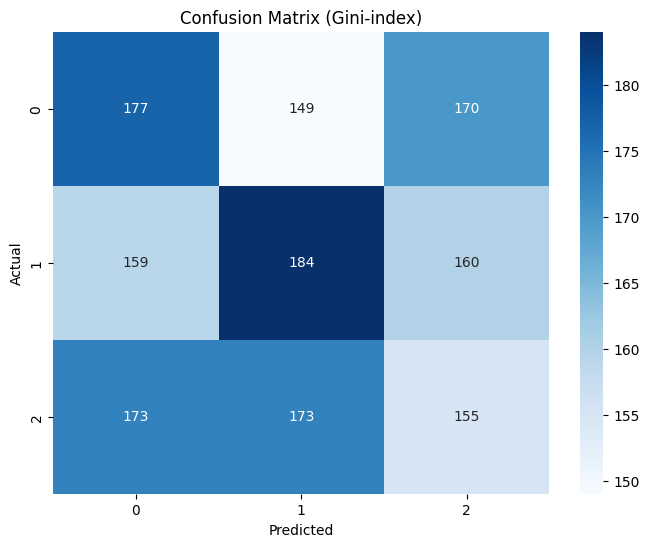

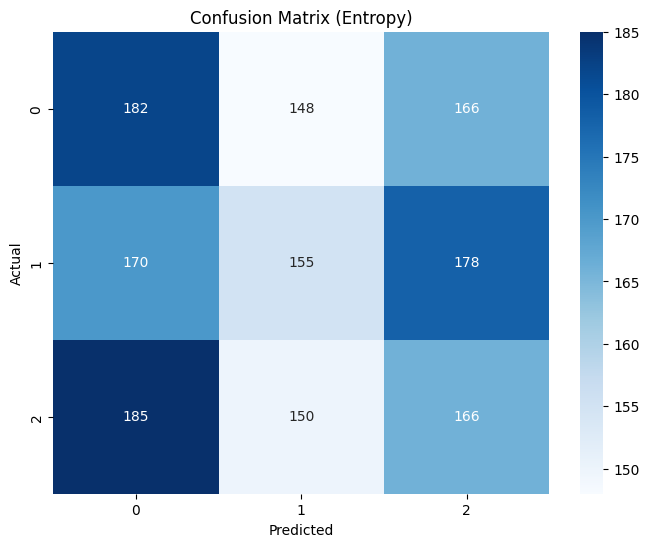

In [32]:
from sklearn.metrics import confusion_matrix

# 11. Confusion Matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

classes = label_encoders['Stress_Level'].classes_ if 'Stress_Level' in label_encoders else [str(cls) for cls in gini_tree.classes_]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (Gini-index)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_entropy, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [30]:
# Results and conclusion
print("\nResults and Conclusion:")
print("Gini-index Tree Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Entropy Tree Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Gini-index Tree F1 Score:", f1_score(y_test, y_pred_gini, average='weighted'))
print("Entropy Tree F1 Score:", f1_score(y_test, y_pred_entropy, average='weighted'))


Results and Conclusion:
Gini-index Tree Accuracy: 0.344
Entropy Tree Accuracy: 0.3353333333333333
Gini-index Tree F1 Score: 0.3437857229531714
Entropy Tree F1 Score: 0.3349368861538657
